<a href="https://colab.research.google.com/github/xiaoyi-yuxiao/python-code-for-FinancialAnalysis-book/blob/master/Chapter11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tabulate import tabulate

ApiKey = '6f687ccb520121389797f851cf764bf7'

In [ ]:
def usr_input():
  ticker_1 = input('Enter 1st ticker:(defalut AAPL) ') or 'AAPL'
  ticker_2 = input('Enter 2nd ticker:(defalut MSFT) ') or 'MSFT'
  return ticker_1,ticker_2

In [ ]:
def get_jsonparsed_data(url):

    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [ ]:
def get_dictdata(ticker):

  url = ('https://financialmodelingprep.com/api/v3/income-statement/'+ticker+'?apikey=' + ApiKey)
  Data = get_jsonparsed_data(url)
  eps = []
  date = []
  links = []
  for element in range(len(Data)):
    eps.append(Data[element]['eps'])
    date.append(Data[element]['date'])
    links.append(Data[element]['finalLink'])

  dictdata = {ticker+' Date':date,ticker+' EPS':eps,ticker+ ' Link':links}


  return dictdata

In [ ]:
ticker_1,ticker_2 = usr_input()

Enter 1st ticker:(defalut AAPL) 
Enter 2nd ticker:(defalut MSFT) 


In [ ]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.set_option('max_colwidth', 1000)
test1 = get_dictdata(ticker_1)
test2 = get_dictdata(ticker_2)
framedata1 = pd.DataFrame(test1)
framedata2 = pd.DataFrame(test2)
print(framedata1)
print('')
print(framedata2)

     AAPL Date  AAPL EPS  \
0   2019-09-28     11.97   
1   2018-09-29     12.01   
2   2017-09-30      9.27   
3   2016-09-24      8.35   
4   2015-09-26      9.28   
5   2014-09-27      6.49   
6   2013-09-28     40.03   
7   2012-09-29     44.64   
8   2011-09-24     28.05   
9   2010-09-25     15.41   
10  2009-09-26      6.39   
11  2008-09-27      5.48   
12  2007-09-29      4.04   
13  2006-09-30      1.65   
14  2005-09-24      1.65   
15  2004-09-25      0.74   
16  2003-09-27      0.19   
17  2002-09-28      0.18   
18  2001-09-29     -0.11   

                                                                                 AAPL Link  
0   https://www.sec.gov/Archives/edgar/data/320193/000032019319000119/a10-k20199282019.htm  
1   https://www.sec.gov/Archives/edgar/data/320193/000032019318000145/a10-k20189292018.htm  
2   https://www.sec.gov/Archives/edgar/data/320193/000032019317000070/a10-k20179302017.htm  
3   https://www.sec.gov/Archives/edgar/data/320193/0001628280160203

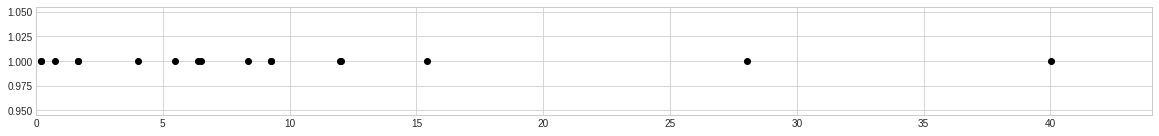

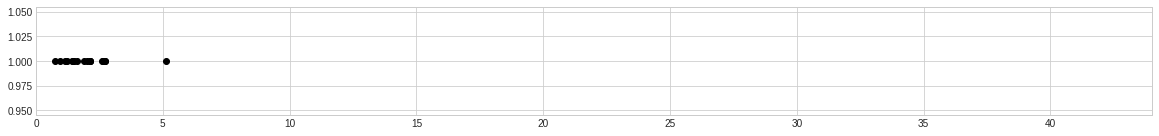

In [ ]:
eps_1 = test1[ticker_1+' EPS']
eps_2 = test2[ticker_2+' EPS']
Y_1 = np.ones((len(eps_1)))
Y_2 = np.ones((len(eps_2)))
s = max(max(eps_1), max(eps_2))
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,2))
plt.xlim(0,int(s))
plt.plot(eps_1, Y_1, 'o', color='black');
plt.figure(figsize=(20,2))
plt.xlim(0,int(s))
plt.plot(eps_2, Y_2, 'o', color='black');

#scale for both dot plot needs to be same

Text(0, 0.5, 'EPS')

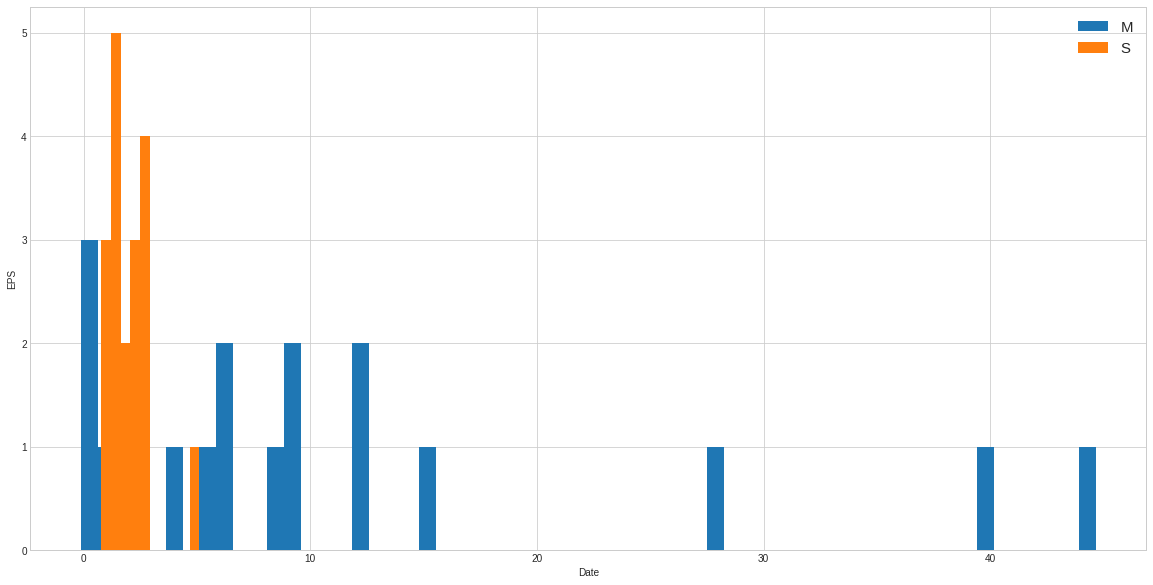

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(eps_1,bins=60)
plt.legend(labels =ticker_1,fontsize=15,  loc=0)
plt.hist(eps_2)
plt.legend(labels =ticker_2,fontsize=15,  loc=0)
plt.xlabel('Date')
plt.ylabel('EPS')


# i think dot plot looks nicer than histogram
# X-axis should be earnings per share
# y-axis should be frequency.

In [ ]:
print('Two sample T test result '+ticker_1+' vs '+ticker_2)
print('')
stat,pval = stats.ttest_ind(eps_1,eps_2)
Number_1 = len(eps_1)
Number_2 = len(eps_2)
mean_1 = np.mean(eps_1)
mean_2 = np.mean(eps_2)
std_1 = np.std(eps_1)
std_2 = np.std(eps_2)
metric = {'stock Name':[ticker_1,ticker_2],'N':[Number_1,Number_2],'Mean':[mean_1,mean_2],'standard deviation':[std_1,std_2]}
metric = pd.DataFrame(metric)
print(tabulate(metric,headers=metric.columns,tablefmt="github",showindex=False))
print('')
print('T test for hypothesis for equal mean on eps for '+ticker_1+' and '+ticker_2)
print('T = 0.05, P = {}, DF = {}, with assumed same std'.format(np.round(pval,4),Number_1+Number_2-2))
if pval<0.05:
  print('we reject the Null hypothesis because T > P')
else:
  print('we can not reject the Null hypothesis because T <= P')

Two sample T test result AAPL vs MSFT

| stock Name   |   N |     Mean |   standard deviation |
|--------------|-----|----------|----------------------|
| AAPL         |  19 | 10.8268  |            12.6842   |
| MSFT         |  18 |  2.01167 |             0.963173 |

T test for hypothesis for equal mean on eps for AAPL and MSFT
T = 0.05, P = 0.0071, DF = 35, with assumed same std
we reject the Null hypothesis because T > P
